In [1]:
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras import metrics
import matplotlib.pyplot as plt

In [2]:
train_path = '../chest_xray/train'
test_path = '../chest_xray/test'
val_path = '../chest_xray/val'

train_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=45,
    zoom_range=0.3
)

train_ds = train_generator.flow_from_directory(
    train_path,
    target_size=(256,256),
    class_mode='binary',
)

Found 4175 images belonging to 2 classes.


In [3]:
val_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

val_ds = val_generator.flow_from_directory(
    val_path,
    target_size=(256,256),
    class_mode='binary',
)

Found 1057 images belonging to 2 classes.


In [4]:
test_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

test_ds = test_generator.flow_from_directory(
    test_path,
    target_size=(256,256),
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [5]:
model = models.Sequential()

model.add(layers.Conv2D(32, (1, 1), activation='relu',padding='same',
                        input_shape=(256, 256, 3)))     
model.add(layers.Conv2D(32, (1, 1), activation='relu',padding='same'))                
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (1, 1), activation='relu',padding='same'))
model.add(layers.Conv2D(64, (1, 1), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (1, 1), activation='relu',padding='same'))
model.add(layers.Conv2D(128, (1, 1), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (1, 1), activation='relu',padding='same'))
model.add(layers.Conv2D(256, (1, 1), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
checkpoint = keras.callbacks.ModelCheckpoint(
    monitor='val_loss',
    filepath='save_data/08_even_larger_network.hdf5',
    save_best_only=True,
    verbose=0
)

callbacks = [checkpoint]

In [7]:
use_metrics = [metrics.BinaryAccuracy(),\
                metrics.Precision(),\
                metrics.Recall()]

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.Adam(),
    metrics=[use_metrics]
)

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      1056      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      2112      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      4160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 128)       8

In [8]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks
)

model.load_weights('save_data/08_even_larger_network.hdf5')

Epoch 1/20
131/131 [==============================] - 109s 831ms/step - loss: 0.5833 - binary_accuracy: 0.7322 - precision: 0.7415 - recall: 0.9816 - val_loss: 0.4822 - val_binary_accuracy: 0.7408 - val_precision: 0.7408 - val_recall: 1.0000
Epoch 2/20
131/131 [==============================] - 114s 868ms/step - loss: 0.4133 - binary_accuracy: 0.7696 - precision: 0.7787 - recall: 0.9635 - val_loss: 0.2603 - val_binary_accuracy: 0.8846 - val_precision: 0.9797 - val_recall: 0.8621
Epoch 3/20
131/131 [==============================] - 107s 815ms/step - loss: 0.3400 - binary_accuracy: 0.8479 - precision: 0.8919 - recall: 0.9048 - val_loss: 0.2501 - val_binary_accuracy: 0.8855 - val_precision: 0.9367 - val_recall: 0.9068
Epoch 4/20
131/131 [==============================] - 107s 814ms/step - loss: 0.2776 - binary_accuracy: 0.8891 - precision: 0.9217 - recall: 0.9297 - val_loss: 0.1763 - val_binary_accuracy: 0.9272 - val_precision: 0.9633 - val_recall: 0.9374
Epoch 5/20
131/131 [============

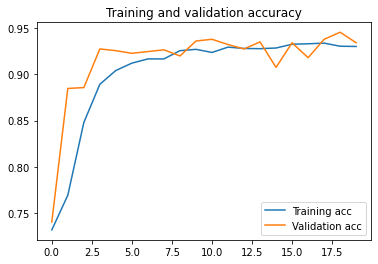

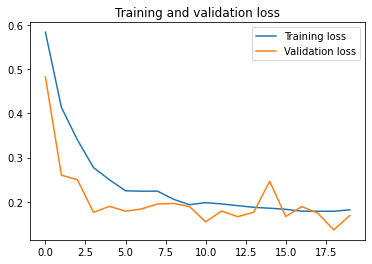

In [9]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [10]:
train_res = model.evaluate(train_ds)

131/131 [==============================] - 56s 431ms/step - loss: 0.1405 - binary_accuracy: 0.9483 - precision: 0.9572 - recall: 0.9739


In [11]:
val_res = model.evaluate(val_ds)

34/34 [==============================] - 8s 246ms/step - loss: 0.1367 - binary_accuracy: 0.9451 - precision: 0.9763 - recall: 0.9489


In [12]:
test_res = model.evaluate(test_ds)

20/20 [==============================] - 4s 217ms/step - loss: 0.4621 - binary_accuracy: 0.8718 - precision: 0.8414 - recall: 0.9795
